In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *

In [2]:
data = np.load('dataset2.npz')
X = data['X']
Y = data['Y']
train_indices = data['train_indices']
test_indices = data['test_indices']

print(train_indices)
ssnmf = Needell_SSNMF(X,Y, split_train_test=False, train_indices=train_indices, test_indices=test_indices)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': range(6,10),'lambda': np.linspace(0,1,10), 'random_state': range(0,10)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


[   0    1    2 ... 1997 1998 1999]
best train results:  (1.0, {'k': 6, 'lambda': 0.1111111111111111, 'random_state': 9}, 14.642122911341776, 7.220545682287827, 0.762)
best test results:  (0.812, {'k': 6, 'lambda': 0.3333333333333333, 'random_state': 5})


Best train:  1.0
Best test:  0.812


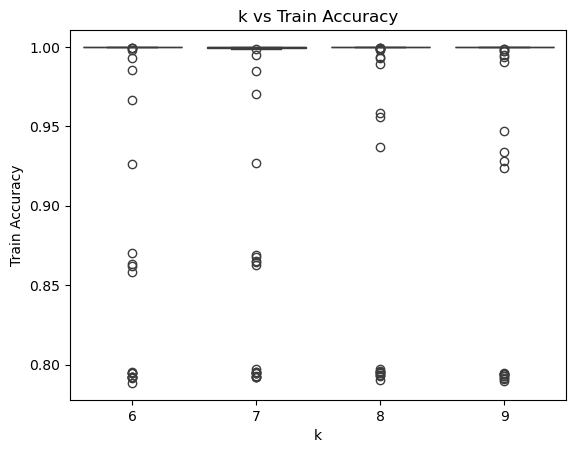

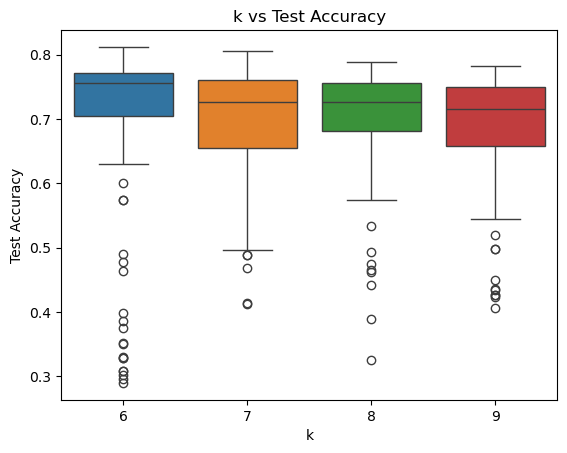

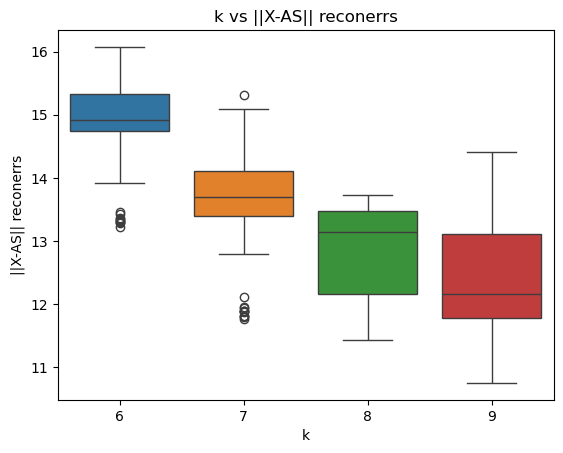

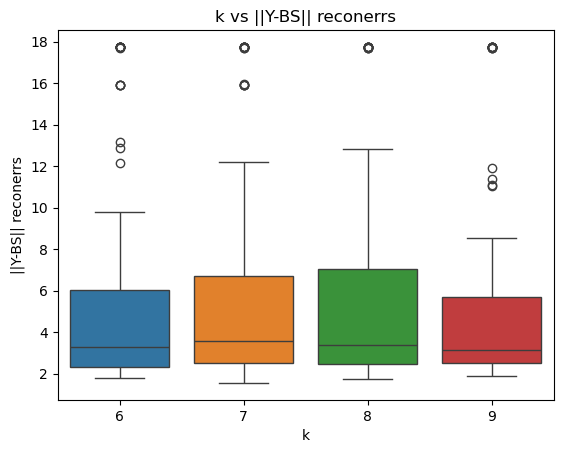

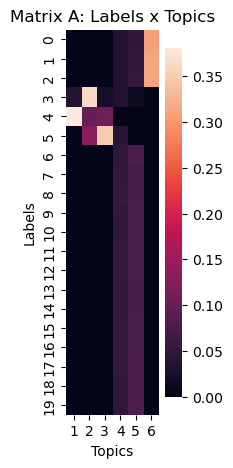

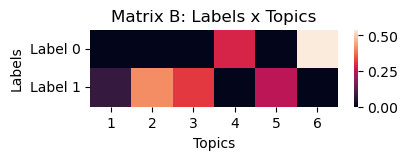

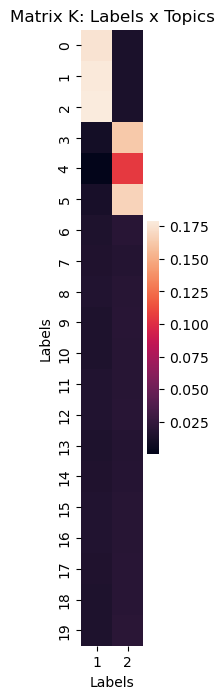

In [3]:
best_train_accu = train_results['best_train_accu']
best_train_param = train_results['best_train_param']
train_accu_distr = train_results['train_accu_distr']

best_test_accu = test_results['best_test_accu']
best_test_param = test_results['best_test_param']
test_accu_distr = test_results['test_accu_distr']

print('Best train: ', best_train_accu)
print('Best test: ', best_test_accu)

display_distr(train_accu_distr, ylabel='Train Accuracy')
display_distr(test_accu_distr, ylabel='Test Accuracy')

Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = 'Labels'
labels = list(range(0, X.shape[1]))
best_model = ssnmf.get_best_fulldata_model()
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels={'Label 0','Label 1'}) 

In [4]:
# Accuracy distribution statistics
mean = train_accu_distr.mean()
Q1 = train_accu_distr.quantile(0.25)
Q3 = train_accu_distr.quantile(0.75)
print('Mean Training Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

mean = test_accu_distr.mean()
Q1 = test_accu_distr.quantile(0.25)
Q3 = test_accu_distr.quantile(0.75)
print('Mean Testing Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Training Accuracy:
6    0.972515
7    0.971445
8    0.977670
9    0.976340
dtype: float64
IQR:
6    0.0000
7    0.0005
8    0.0000
9    0.0000
dtype: float64
Mean Testing Accuracy:
6    0.68360
7    0.69710
8    0.69588
9    0.68428
dtype: float64
IQR:
6    0.0680
7    0.1060
8    0.0750
9    0.0905
dtype: float64
